## Pymonia Investigation

The citizens of _Minervopolis_ are in a panic! About a third of the population is suspected of having a fever. Even worse, a newly discovered disease, _Pymonia_, has been detected among the population. Some limited data have been collected on the incidence and symptoms of this disease among Minervopolis’ approximately 100,000 residents. There are two types of measurements collected so far:


1. **fever.csv**: two columns of data indicating diagnosis (in column 1) and highest recorded fever in Fahrenheit since symptoms began (in column 2). This dataset contains a sample of people infected with Pymonia, labeled with `Py` and a sample of people without any virus, labeled with `No`. Each row represents a different patient. All these patients were sampled uniformly from the population of people reporting fevers, and sorted according to whether they had Pymonia or not.


2. **WBC.csv**: two columns of data indicating diagnosis (in column 1) and white blood cell count (in column 2). Note that a white blood cell count below 1700 is considered abnormally low, and a value below 500 indicates a high risk of secondary infection. Each row represents a different patient. These patients were sampled uniformly from the total population of Minervaopolis.


*Should the citizens of Minervopolis be concerned about the Pymonia virus?*

In [1]:
# import useful packages
import pandas as pd
pd.set_option('max_rows', 10)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

# read in two data files
feverdata = pd.read_csv('fever.csv')
WBCdata = pd.read_csv('WBC.csv')

# print the size (rows, columns)
print('fever data dimensions:',feverdata.shape)
print('WBC data dimensions:',WBCdata.shape)

fever data dimensions: (89, 2)
WBC data dimensions: (69, 2)


In [2]:
# look at some of the fever data
feverdata

,Diagnosis,High Temperature
0,No,105.0
1,No,101.0
2,No,104.0
3,No,101.0
4,No,101.0
...,...,...
84,Py,102.5
85,Py,101.0
86,Py,102.5
87,Py,102.0


In [3]:
# look at some of  the WBC data
WBCdata

,Diagnosis,WBC
0,No,9211
1,No,530
2,No,776
3,No,110
4,No,9334
...,...,...
64,Py,6566
65,Py,1328
66,Py,687
67,Py,2525


In [3]:
# define a function to print out some simple statistics
def print_stats(list):
    print('count:',len(list))
    print('mean:',np.mean(list))
    print('std:',np.std(list,ddof=1),"\n")

# define a function to make two histograms for each category
def double_histogram_maker(list1,list2,category):
    fig, axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].hist(list1);
    axs[1].hist(list2);
    axs[0].title.set_text('No Virus')
    axs[1].title.set_text('Pymonia')
    for ax in axs.flat:
        ax.set(xlabel=category, ylabel='Frequency')

--No virus--
count: 50
mean: 101.59
std: 1.544212367757328 

--Pymonia--
count: 39
mean: 102.91025641025641
std: 2.344848201999088 



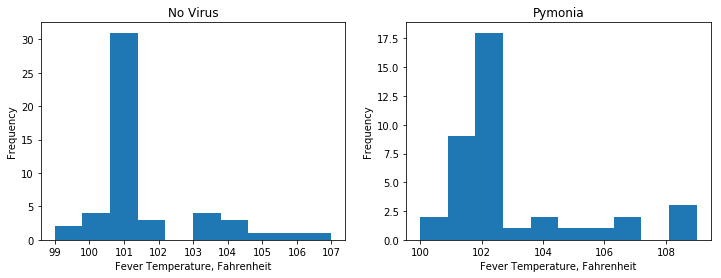

In [5]:
# FEVER DATA:

# define two new lists to separate the fever data by diagnosis:
# 'No' for no virus and 'Py' for Pymonia
fever_No = list(feverdata[feverdata.Diagnosis == 'No'].values[:,1])
fever_Py = list(feverdata[feverdata.Diagnosis == 'Py'].values[:,1])

# print the stats for each category
print('--No virus--')
print_stats(fever_No)
print('--Pymonia--')
print_stats(fever_Py)

# make histograms grouped by diagnosis by calling function defined above
double_histogram_maker(fever_No,fever_Py,'Fever Temperature, Fahrenheit')

--No virus--
count: 44
mean: 5175.681818181818
std: 3029.292816182246 

--Pymonia--
count: 25
mean: 3314.16
std: 2906.065964495644 



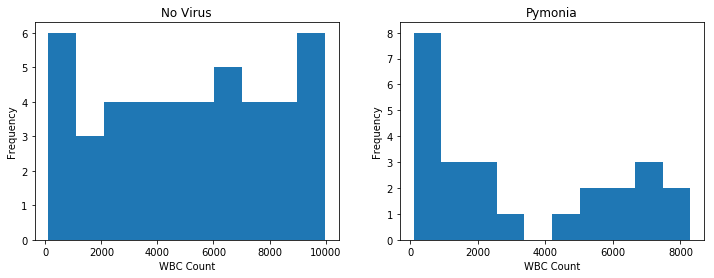

In [6]:
# WBC DATA:

# define two new lists to separate the WBC data by diagnosis:
# 'No' for no virus and 'Py' for Pymonia
WBC_No = list(WBCdata[WBCdata.Diagnosis == 'No'].values[:,1])
WBC_Py = list(WBCdata[WBCdata.Diagnosis == 'Py'].values[:,1])

# print the stats for each category
print('--No virus--')
print_stats(WBC_No)
print('--Pymonia--')
print_stats(WBC_Py)

# make histograms grouped by diagnosis by calling previously defined function
double_histogram_maker(WBC_No,WBC_Py,'WBC Count')